#House Price Prediction by Sarun Natarajan

##Step 1: Reading and understanding the data

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read dataset

df = pd.read_csv("/content/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Checking out the columns, its datatype and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Checking the shape of the data

df.shape

(1460, 81)

In [5]:
# Statistical summary of numerical columns

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


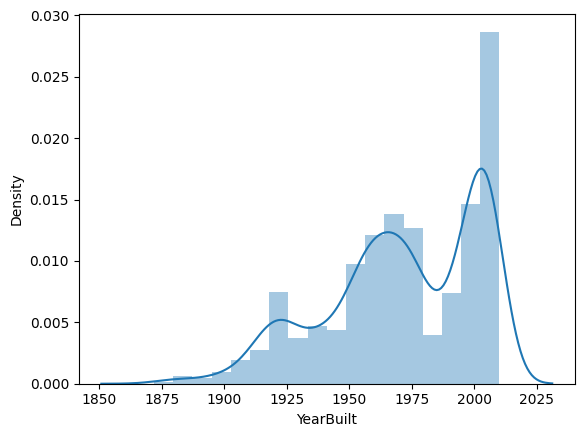

In [6]:
# year built
sns.distplot(df['YearBuilt'])
plt.show()

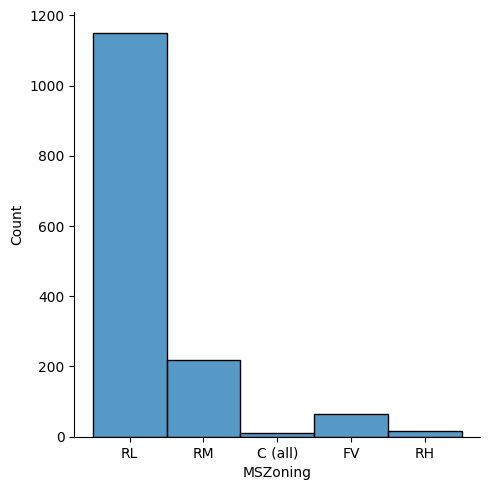

In [7]:
# MSZoning - general zoning classification of the sale
sns.displot(df['MSZoning'])
plt.show()

##Step 2: Data Preparation

In [8]:
# drop ID column and columns with high null values

df.drop(["Id", "Alley", "PoolQC", "MiscFeature", "Fence"], axis=1, inplace = True)

In [10]:
# convert year column to no. of years from present

years_columns = ["GarageYrBlt","YearBuilt","YearRemodAdd", "YrSold"]

df[years_columns] = 2023 - df[years_columns]

In [11]:
# Imputing null values for categorical columns

df['MasVnrType'].fillna('None', inplace=True)
df['FireplaceQu'].fillna('No Fireplace', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)
df['LotFrontage'].fillna(0, inplace=True)
df['GarageType'].fillna('No Garage', inplace=True)
df['GarageFinish'].fillna('No Garage', inplace=True)
df['GarageQual'].fillna('No Garage', inplace=True)
df['GarageCond'].fillna('No Garage', inplace=True)
df['BsmtQual'].fillna('Missing', inplace=True)
df['BsmtCond'].fillna('Missing', inplace=True)
df['BsmtExposure'].fillna('Missing', inplace=True)
df['BsmtFinType1'].fillna('Missing', inplace=True)
df['BsmtFinType2'].fillna('Missing', inplace=True)
df['Electrical'].fillna('Missing', inplace=True)
df['GarageYrBlt'].fillna(0, inplace=True)

In [12]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [13]:
# converting int columns to categorical variables

columns_to_object = [
    "MSSubClass", "OverallCond", "BsmtFullBath", "OverallQual", "BsmtHalfBath",
    "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd",
    "Fireplaces", "GarageCars"
]

df[columns_to_object] = df[columns_to_object].astype("object")

##Step 3: Data exploration

In [14]:
# all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [15]:
df_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,51.732192,38.134247,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,15.184247,180921.195890
std,34.664304,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,1300.000000,13.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,34900.000000
25%,42.000000,7553.500000,23.000000,19.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,14.000000,129975.000000
50%,63.000000,9478.500000,50.000000,29.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,15.000000,163000.000000
75%,79.000000,11601.500000,69.000000,56.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,16.000000,214000.000000
90%,92.000000,14381.700000,98.100000,73.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,17.000000,278000.000000
95%,104.000000,17401.150000,107.000000,73.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,17.000000,326100.000000
99%,137.410000,37567.640000,123.820000,73.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,17.000000,442567.010000


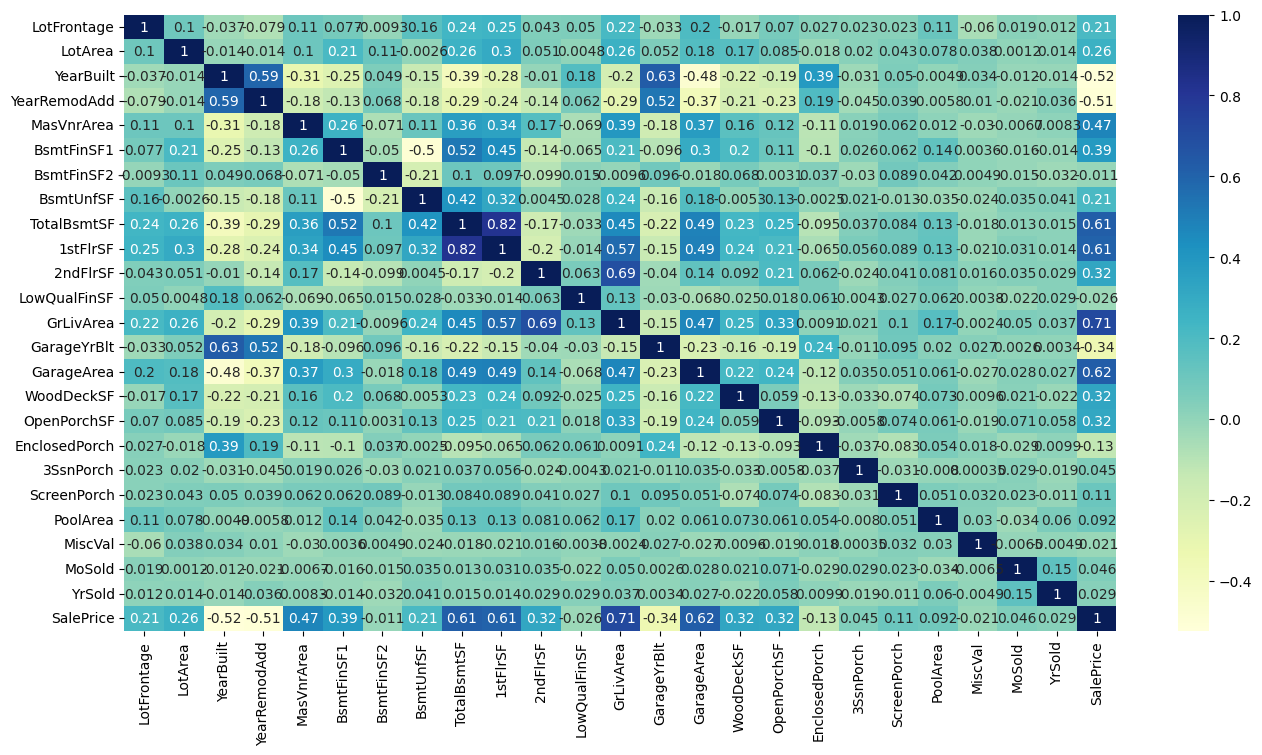

In [16]:
# correlation matrix
cor = df_numeric.corr()

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()



*   TotalBsmtSF and 1stFlrSF has high positive correlation
*   GrLivArea, GarageArea, TotalBsmtSF has high correlation with target variable






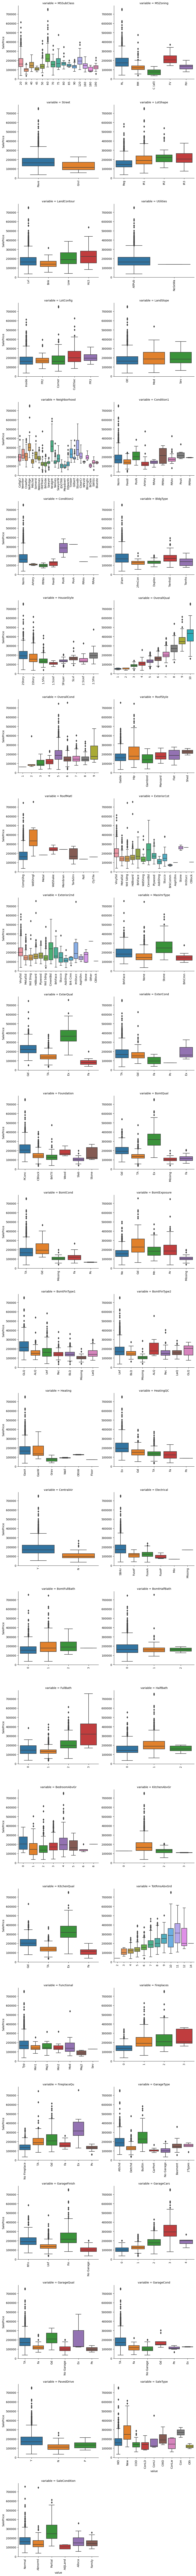

In [17]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

df_categorical = df.select_dtypes(include=['object'])
column_identifiers = pd.melt(df, id_vars=['SalePrice'], value_vars=df_categorical)
grid = sns.FacetGrid(column_identifiers, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
grid.map(boxplot, "value", "SalePrice")

## Step 4: Feature Engineering

In [18]:
# split into X and y

X = df.drop(columns=["SalePrice"]) # predictors in variable X

y = df['SalePrice'] # response variable in Y

In [19]:
# creating dummy variables for categorical variables

# subset all categorical variables

house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,No Fireplace,Attchd,RFn,2,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1,TA,Attchd,RFn,2,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,1,TA,Attchd,RFn,2,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1,Gd,Detchd,Unf,3,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,1,TA,Attchd,RFn,3,TA,TA,Y,WD,Normal


In [21]:
# convert into dummies - one hot encoding

house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [22]:
# drop categorical variables as dummies are already created
X = X.drop(list(house_categorical.columns), axis=1)

In [23]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [24]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=304)

In [25]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Step 5: Model Building

In [26]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
print(lm.intercept_)
print(lm.coef_)

-1507797965887.2148
[ 3.39633624e+02  7.17839562e+03 -1.33775446e+04 -1.73080026e+03
  2.47393709e+03 -4.07492269e+14 -1.44127673e+14 -3.94777728e+14
  3.91953028e+14  1.83599399e+14  2.07317384e+14  2.30922186e+13
 -2.49562708e+14 -1.18685716e+03  2.59700897e+03  4.82754929e+02
  2.03931742e+03  5.49994020e+02  1.46693415e+03  9.88942588e+02
  4.03230009e+03  5.21608682e+02 -7.65003668e+02  8.67861336e+01
  8.73434480e+02 -2.89853533e+01  4.43498919e+02 -6.11294943e+02
  4.08621754e+03  1.50094820e+03 -3.67374513e+03 -7.74468326e+02
 -1.90674822e+03 -1.24366830e+13 -6.88062500e+02  1.46664062e+02
 -4.15110352e+02 -8.15750750e+13  8.17326660e+03  4.44270508e+03
  1.72166094e+04  1.34412500e+04  1.52003711e+03  7.71875000e+01
  5.19427734e+02  3.14734375e+02 -4.90054688e+02 -6.62728516e+02
  1.10937500e+03 -1.70958984e+02  1.43542969e+03 -1.31324219e+03
  2.79830078e+02 -6.72104980e+02  1.23786719e+03 -1.96340918e+03
  8.20722656e+02  4.99589844e+02  1.90831104e+03 -1.23437500e+00
  3.2

In [28]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9611584952564933
-1.5932581653020974e+18
247835942686.7757
4.490936754619983e+30
242738435.54042673
1.0253280261689459e+28


##Step 6: Ridge Regression

In [29]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low,
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [30]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [31]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.62244436e+02  3.09950874e+03 -2.10062636e+03 -3.34497420e+03
  2.80159563e+03  2.75260492e+03  9.40908447e+02  5.86311405e+02
  3.79825832e+03  5.52209998e+03  3.76196500e+03 -4.09375963e+02
  7.14979253e+03 -8.87061873e+02  2.88013722e+03  1.54460961e+03
  1.31119167e+03 -1.14589796e+02  1.31968789e+03  1.43945334e+03
  1.39598865e+02  2.18220537e+02 -2.21797856e+02 -1.59406548e+02
 -1.16535974e+03 -1.04427055e+02  1.07248383e+02  2.33401369e+02
  4.76482080e+02  7.33429170e+02 -1.06569598e+01 -7.10490471e+02
 -4.11405429e+02 -6.63358812e+02 -1.20123622e+03 -1.31957447e+03
 -6.19101863e+02 -7.91120536e+02  7.31179555e+02  3.72715222e+01
  1.19463316e+03 -7.52305103e+02  6.32646562e+02  3.35124399e+02
 -1.35980377e+03 -3.99549830e+02  8.18983019e+02  3.53449578e+02
  1.35248485e+03 -7.03971563e+02  1.75098044e+03 -8.92600256e+02
 -1.88012817e+02 -5.28145086e+02  8.36234388e+02  2.86506117e+02
  1.78416478e+01 -3.63960530e+02  2.42898021e+02  7.10594705e+02
 -6.55981429e+02  2.92047

In [32]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9080515312853757
0.8637568973311764
586695483941.1576
384030140666.4182
574628289.854219
876781143.0740142


## Step 7: Lasso Regression

In [33]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [34]:
print(model_cv.best_params_)

{'alpha': 500}


In [35]:
alpha = 500

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=500)

In [36]:
lasso.coef_

array([-0.00000000e+00,  4.45188954e+03, -8.20001145e+03, -4.44464332e+03,
        7.43790317e+02,  2.71900284e+03,  1.84458788e+02, -0.00000000e+00,
        4.39603510e+03,  3.28690323e+02,  0.00000000e+00, -1.64979644e+03,
        2.80814534e+04, -0.00000000e+00,  4.41026480e+02,  4.61067051e+02,
        7.68196188e+02, -0.00000000e+00,  1.17305668e+03,  1.50235704e+03,
       -0.00000000e+00,  0.00000000e+00, -7.82814776e+01, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  1.27642136e+01,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -9.54899993e+02, -0.00000000e+00,
       -0.00000000e+00, -4.04509445e+02, -0.00000000e+00, -6.94037496e+02,
       -0.00000000e+00, -1.20382075e+03,  0.00000000e+00,  0.00000000e+00,
        1.42665933e+03, -0.00000000e+00,  5.63040074e+02,  0.00000000e+00,
       -1.05433722e+03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.18996686e+03, -2.80389267e+02,  1.78694719e+03, -3.04262190e+02,
        0.00000000e+00, -

In [37]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9330489385519944
0.8400463747201017
427194557405.004
450863287851.409
418407989.62292266
1029368237.1036735


In [38]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.611585e-01,9.080515e-01,9.330489e-01
1,R2 Score (Test),-1.593258e+18,8.637569e-01,8.400464e-01
2,RSS (Train),2.478359e+11,5.866955e+11,4.271946e+11
3,RSS (Test),4.490937e+30,3.840301e+11,4.508633e+11
4,MSE (Train),1.558007e+04,2.397141e+04,2.045502e+04
5,MSE (Test),1.012585e+14,2.961049e+04,3.208377e+04


In [39]:
# change in coefficients after regularisation

betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,3.396336e+02,162.244436,-0.000000
LotArea,7.178396e+03,3099.508736,4451.889539
YearBuilt,-1.337754e+04,-2100.626362,-8200.011446
YearRemodAdd,-1.730800e+03,-3344.974205,-4444.643323
MasVnrArea,2.473937e+03,2801.595629,743.790317
BsmtFinSF1,-4.074923e+14,2752.604919,2719.002843
BsmtFinSF2,-1.441277e+14,940.908447,184.458788
BsmtUnfSF,-3.947777e+14,586.311405,-0.000000
TotalBsmtSF,3.919530e+14,3798.258323,4396.035105
1stFlrSF,1.835994e+14,5522.099979,328.690323


## Subjective Questions

In [40]:
# Question 1

# double alpha for lasso

alpha = 1000

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9103073394161616
0.835880245869604
572301851709.2018
462606407445.3611
560530706.865036
1056179012.4323312


In [41]:
# double alpha for ridge

alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.886716508170232
0.8553919598708948
722827840318.7708
407608494701.3108
707960666.3259263
930613001.6011662


In [44]:
model_coefficients = pd.DataFrame(index=X_test.columns)
model_coefficients.rows = X_test.columns

model_coefficients['Ridge (alpha=1000)'] = ridge.coef_
model_coefficients['Lasso (alpha=1000)'] = lasso.coef_
pd.set_option('display.max_rows', None)

In [45]:
model_coefficients.sort_values(by='Lasso (alpha=1000)', ascending=False).head(1)

,Ridge (alpha=1000),Lasso (alpha=1000)
GrLivArea,5978.302958,25696.665449


In [46]:
model_coefficients.sort_values(by='Ridge (alpha=1000)', ascending=False).head(1)

,Ridge (alpha=1000),Lasso (alpha=1000)
GrLivArea,5978.302958,25696.665449


In [47]:
# Question 3

alpha = 500

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

model_coefficients = pd.DataFrame(index=X_test.columns)
model_coefficients.rows = X_test.columns
model_coefficients['Lasso (alpha=500)'] = lasso.coef_
pd.set_option('display.max_rows', None)

model_coefficients.sort_values(by='Lasso (alpha=500)', ascending=False).head(5)

0.9330489385519944
0.8400463747201017
427194557405.004
450863287851.409
418407989.62292266
1029368237.1036735


,Lasso (alpha=500)
GrLivArea,28081.453399
RoofMatl_CompShg,22959.644952
RoofMatl_WdShngl,14460.603607
RoofMatl_Tar&Grv,13573.235812
OverallQual_9,11631.724362


In [48]:
columns_to_drop = [
"GrLivArea",
"RoofMatl_CompShg",
"RoofMatl_WdShngl",
"RoofMatl_Tar&Grv",
"OverallQual_9"
]

X_train_new = X_train.drop(columns_to_drop, axis=1)
X_test_new = X_test.drop(columns_to_drop, axis=1)

alpha = 500

lasso = Lasso(alpha=alpha)

lasso.fit(X_train_new, y_train)

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

coeff = pd.DataFrame(index=X_test_new.columns)
coeff.rows = X_test_new.columns
coeff['Lasso'] = lasso.coef_
coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
1stFlrSF,20505.510451
2ndFlrSF,19334.623274
GarageCars_3,8587.580093
FullBath_3,7014.733396
BsmtExposure_Gd,5646.366918
